In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import sklearn.preprocessing as prep
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

In [3]:
os.chdir(r'C:\buan6383')
dm = pd.read_csv(r'data\dmtrain.csv')
dm

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat,response
0,1,2,30.0,20.0,24,1,6,1
1,2,25,207.0,20.0,24,1,6,0
2,3,5,52.0,15.0,24,1,6,0
3,4,11,105.0,15.0,24,1,6,0
4,5,2,32.0,17.0,24,1,6,0
...,...,...,...,...,...,...,...,...
1995,1996,12,105.0,20.0,1,2,6,0
1996,1997,36,786.0,5.0,1,2,6,0
1997,1998,7,415.0,100.0,1,1,7,0
1998,1999,5,77.0,25.0,1,1,7,0


array([[<Axes: title={'center': 'n24'}>,
        <Axes: title={'center': 'rev24'}>],
       [<Axes: title={'center': 'revlast'}>,
        <Axes: title={'center': 'elpsdm'}>],
       [<Axes: title={'center': 'ordfreq'}>,
        <Axes: title={'center': 'ordcat'}>]], dtype=object)

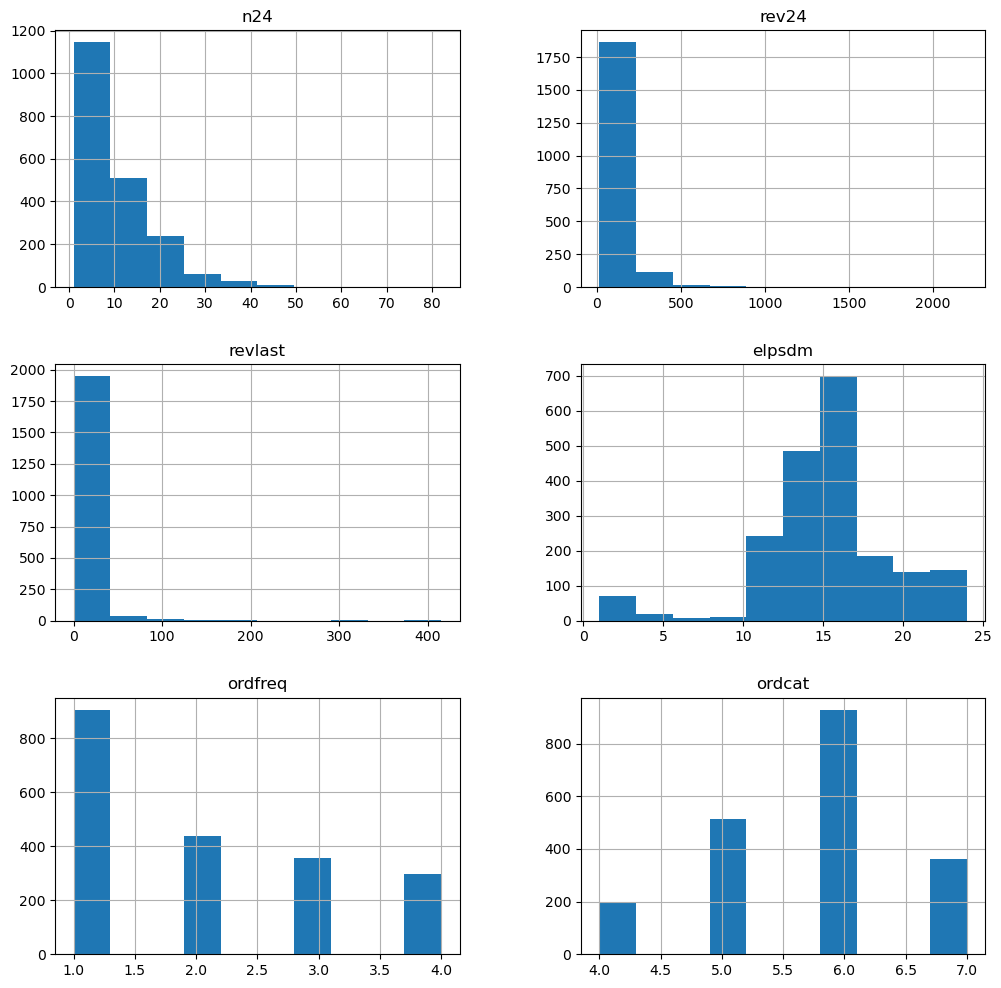

In [4]:
#Plotting histogram for non-binary variables

dm.hist(column = ['n24', 'rev24', 'revlast', 'elpsdm', 'ordfreq', 'ordcat'], bins =10, figsize =(12,12))

In [5]:
# Log transforming on n23, rev24, revlast
dm['log10_n24'] = np.log(dm['n24'])
dm['log10_rev24'] = np.log(dm['rev24'])
dm['log10_revlast'] = np.log(dm['revlast']+0.0000001)


#Printing skewness of each column
dm.skew(axis=0, skipna=True)

id                0.000000
n24               1.935635
rev24             7.221135
revlast          11.968288
elpsdm           -0.774676
ordfreq           0.611939
ordcat           -0.338221
response          0.915611
log10_n24        -0.442413
log10_rev24       0.127623
log10_revlast   -11.313794
dtype: float64

In [6]:
dm = dm.drop(['n24', 'rev24', 'revlast', 'id'], axis =1)
dm

,elpsdm,ordfreq,ordcat,response,log10_n24,log10_rev24,log10_revlast
0,24,1,6,1,0.693147,3.401197,2.995732
1,24,1,6,0,3.218876,5.332719,2.995732
2,24,1,6,0,1.609438,3.951244,2.708050
3,24,1,6,0,2.397895,4.653960,2.708050
4,24,1,6,0,0.693147,3.465736,2.833213
...,...,...,...,...,...,...,...
1995,1,2,6,0,2.484907,4.653960,2.995732
1996,1,2,6,0,3.583519,6.666957,1.609438
1997,1,1,7,0,1.945910,6.028279,4.605170
1998,1,1,7,0,1.609438,4.343805,3.218876


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [8]:
dm.isnull().any()

elpsdm           False
ordfreq          False
ordcat           False
response         False
log10_n24        False
log10_rev24      False
log10_revlast    False
dtype: bool

In [9]:
y = dm['response'].to_numpy()
X = dm.copy()
X = X.drop(['response'], axis = 1)

In [10]:
X

,elpsdm,ordfreq,ordcat,log10_n24,log10_rev24,log10_revlast
0,24,1,6,0.693147,3.401197,2.995732
1,24,1,6,3.218876,5.332719,2.995732
2,24,1,6,1.609438,3.951244,2.708050
3,24,1,6,2.397895,4.653960,2.708050
4,24,1,6,0.693147,3.465736,2.833213
...,...,...,...,...,...,...
1995,1,2,6,2.484907,4.653960,2.995732
1996,1,2,6,3.583519,6.666957,1.609438
1997,1,1,7,1.945910,6.028279,4.605170
1998,1,1,7,1.609438,4.343805,3.218876


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [12]:
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train, y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [13]:
dtree.get_depth()

28

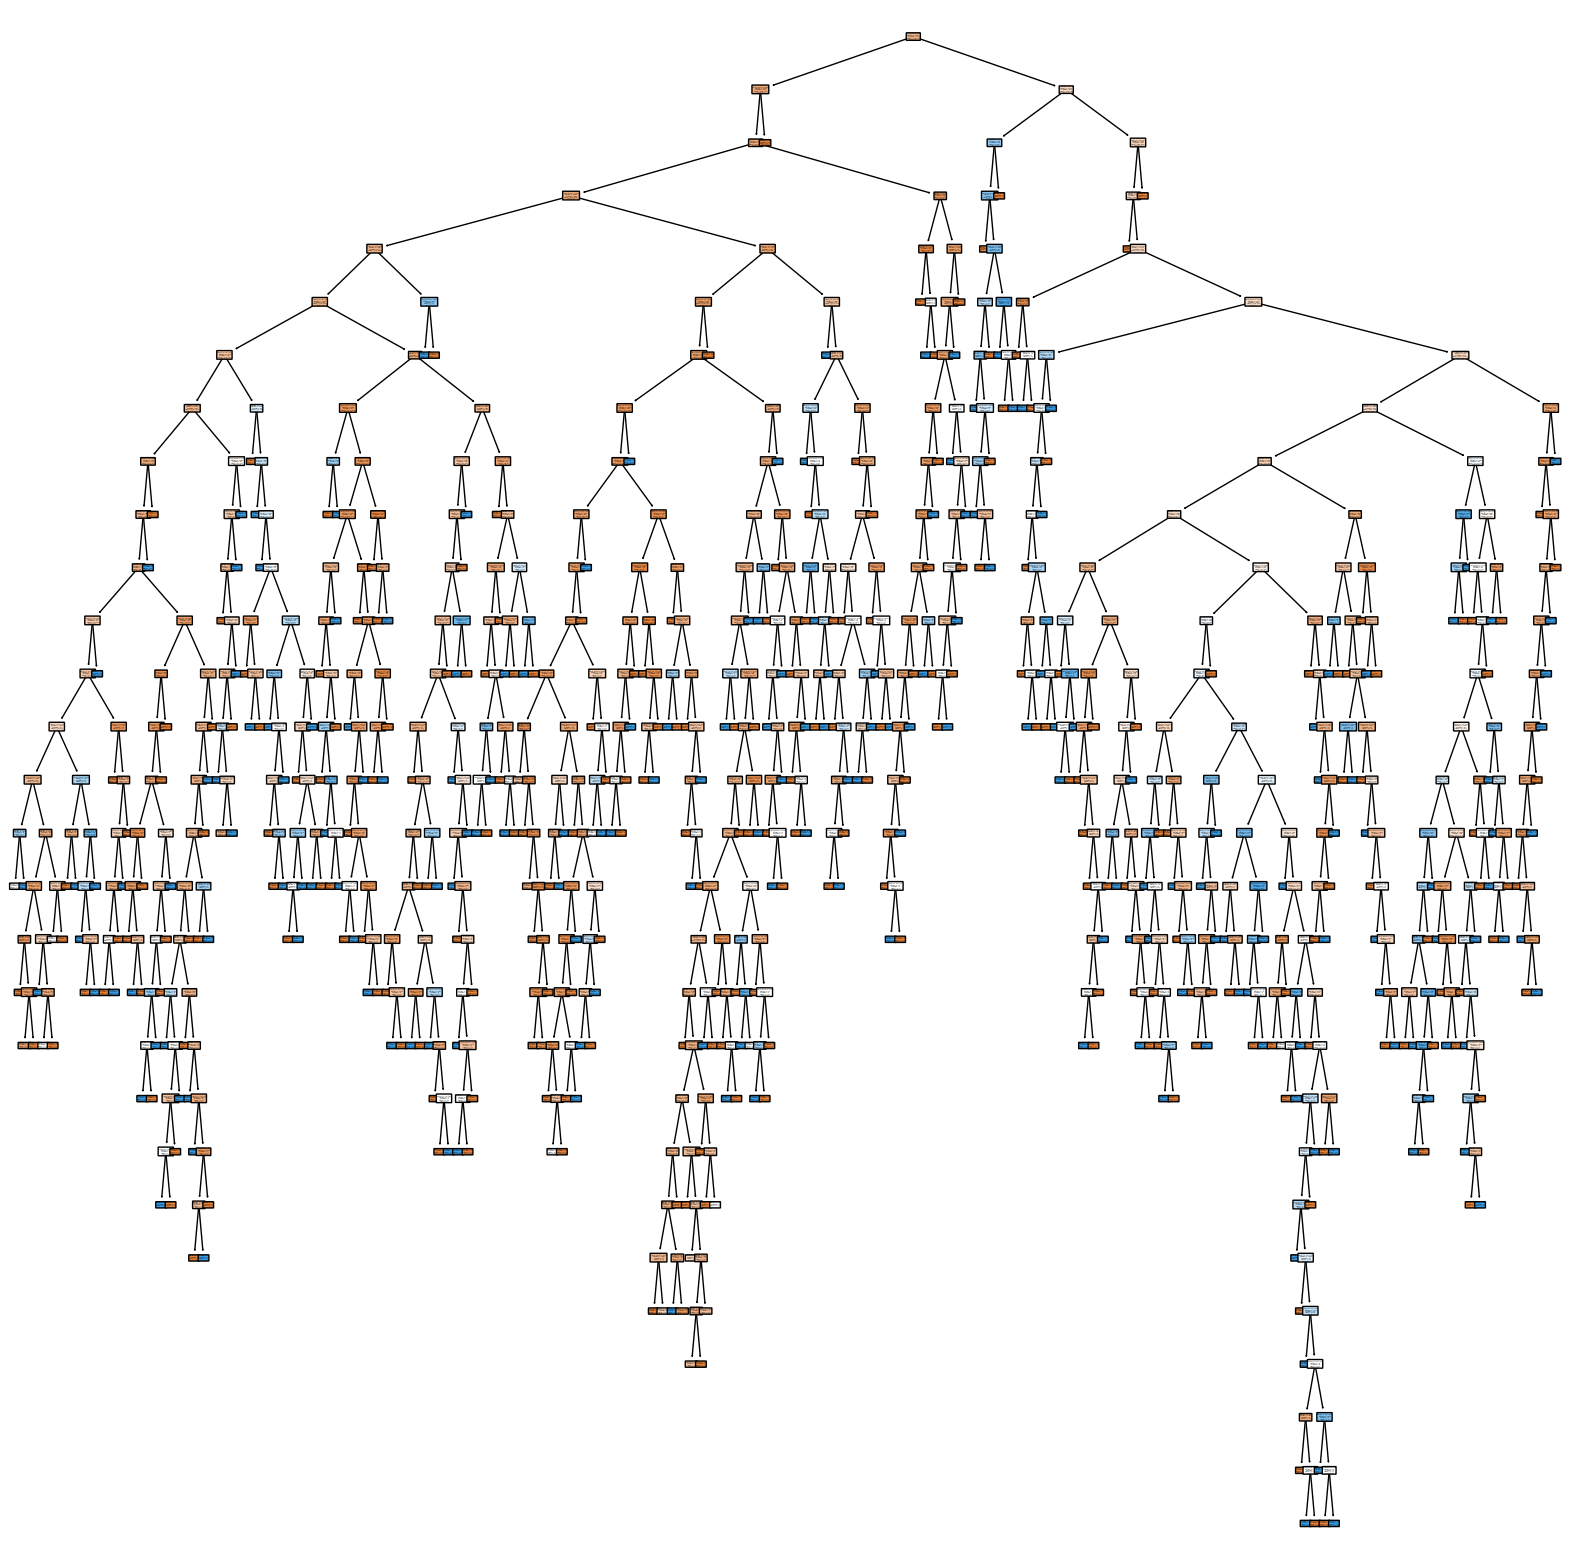

In [14]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = dm.columns, class_names = ['Yes','No'],
                     filled = True , rounded = True)

In [15]:
from sklearn.model_selection import KFold, cross_val_score

In [16]:
# Initializing a 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# function for running cross validation
def run_cross_validation_on_trees(X, y, tree_depths,kf, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=kf, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(20,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim(top=1)
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [17]:
# fitting trees of depth 1 to 49
sm_tree_depths = range(1,50)

In [18]:
# Running cross validation
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train,y_train,sm_tree_depths,kf)

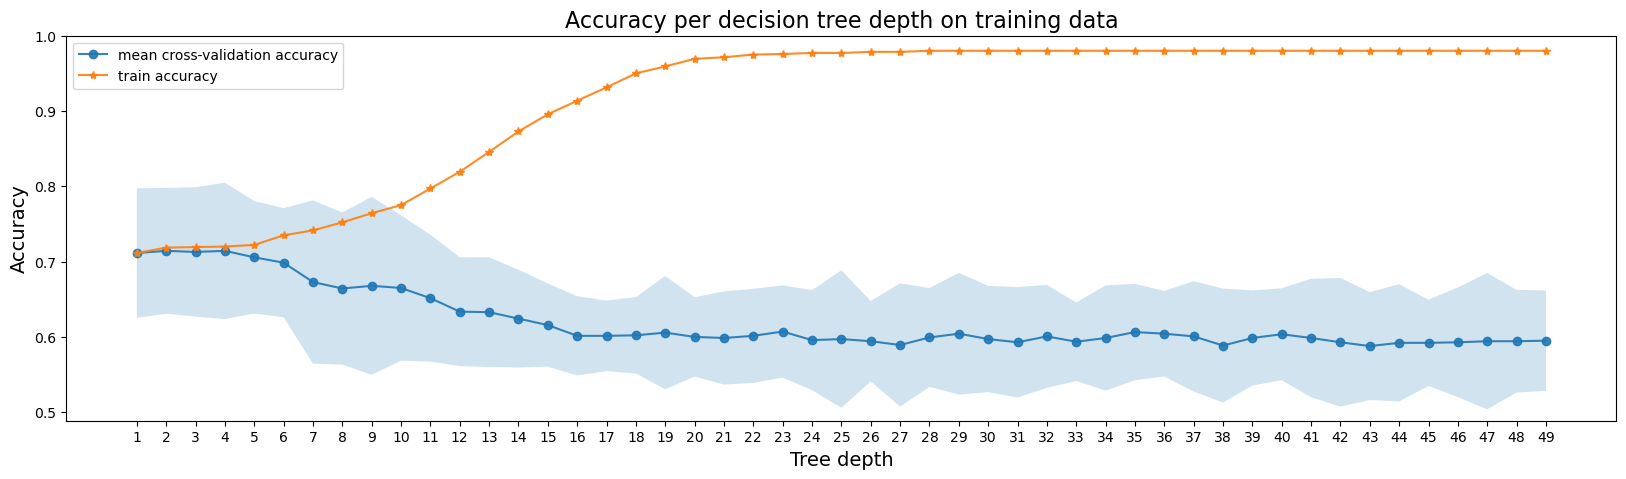

In [19]:
# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [20]:
# Printing the 3 best trees based on accuracy

for i in range(1,4):
    idx_max = np.argsort(sm_cv_scores_mean)[-i]
    sm_best_tree_depth = sm_tree_depths[idx_max]
    sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
    sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
    print(f'The depth-{sm_best_tree_depth} tree achieves the best mean cross-validation accuracy {round(sm_best_tree_cv_score*100,5)} +/- {round(sm_best_tree_cv_score_std*100, 5)}% on training dataset')

The depth-2 tree achieves the best mean cross-validation accuracy 71.42857 +/- 4.1772% on training dataset
The depth-4 tree achieves the best mean cross-validation accuracy 71.42857 +/- 4.52882% on training dataset
The depth-3 tree achieves the best mean cross-validation accuracy 71.28571 +/- 4.29523% on training dataset


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 1)
l = [2,4,3,15]
for i in l:
    clf = RandomForestClassifier(n_estimators=100,max_depth=i, random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f'Accuracy for depth {i} random forest classifiers: {accuracy_score(y_test,y_pred)*100}')

Accuracy for depth 2 random forest classifiers: 70.0
Accuracy for depth 4 random forest classifiers: 70.5
Accuracy for depth 3 random forest classifiers: 70.33333333333334
Accuracy for depth 15 random forest classifiers: 68.33333333333333


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 1)
l = [2,4,3,15]
for i in l:
    clf = RandomForestClassifier(n_estimators=50,max_depth=i, random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f'Accuracy for depth {i} random forest classifiers: {accuracy_score(y_test,y_pred)*100}')

Accuracy for depth 2 random forest classifiers: 70.0
Accuracy for depth 4 random forest classifiers: 71.16666666666667
Accuracy for depth 3 random forest classifiers: 70.66666666666667
Accuracy for depth 15 random forest classifiers: 68.5


In [23]:
# Standardizing data for KNN

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X2 = pd.DataFrame(scaled_features,columns=X.columns)
X2.head()

,elpsdm,ordfreq,ordcat,log10_n24,log10_rev24,log10_revlast
0,2.141979,-0.923902,0.31409,-1.318531,-1.168909,0.323798
1,2.141979,-0.923902,0.31409,1.337988,1.235351,0.323798
2,2.141979,-0.923902,0.31409,-0.354792,-0.484239,0.105939
3,2.141979,-0.923902,0.31409,0.474494,0.390467,0.105939
4,2.141979,-0.923902,0.31409,-1.318531,-1.088575,0.200724


Cross validation average accuracy for k = 5 is 66.57142857142857
Cross validation average accuracy for k = 6 is 70.14285714285714
Cross validation average accuracy for k = 7 is 68.64285714285715
Cross validation average accuracy for k = 8 is 71.07142857142857
Cross validation average accuracy for k = 9 is 68.71428571428572
Cross validation average accuracy for k = 10 is 71.07142857142857


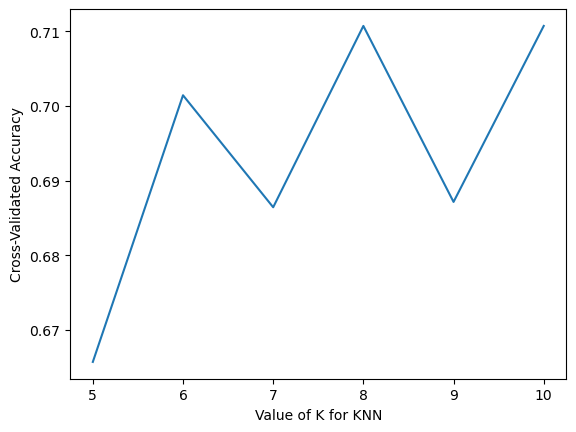

In [24]:
X2_train, X2_test, y_train, y_test = train_test_split(X2 , y, test_size = 0.3, random_state = 1)
kf =KFold(n_splits=10, shuffle=True, random_state=1)
k_range = range(5,11)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X2_train, y_train, cv=kf, scoring='accuracy')
    k_scores.append(scores.mean())
    print("Cross validation average accuracy for k = {} is {}".format(k,scores.mean()*100))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 1)
kf =KFold(n_splits=10, shuffle=True, random_state=1)
model = LogisticRegression()
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print('Accuracy: %.3f (%.3f)' % (scores.mean()*100, scores.std()*100))

Accuracy: 71.571 (4.481)


In [26]:
X_with_const = sm.add_constant(X)

logreg2 = sm.Logit(y, X_with_const).fit()

print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.584178
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1993
Method:                           MLE   Df Model:                            6
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                 0.03271
Time:                        17:49:30   Log-Likelihood:                -1168.4
converged:                       True   LL-Null:                       -1207.9
Covariance Type:            nonrobust   LLR p-value:                 5.695e-15
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6215      0.596      1.042      0.297      -0.547       1.791
elpsdm           -0.

## We are running 10-fold cross validation on Decision Trees, Random Forest and Logistic Regression

In [27]:
# We are running 10-fold cross validation on Decision Trees, Random Forest and Logistic Regression

decision_tree_best = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
random_forest_best = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=0)
#knn_best = KNeighborsClassifier(n_neighbors=12)
logistic_regression = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 1)
models_dict = dict()
models_dict['Decision Tree'] = decision_tree_best
models_dict['Random Forest'] = random_forest_best
#models_dict['KNN'] = knn_best
models_dict['Logistic Regression'] = logistic_regression
kf =KFold(n_splits=10, shuffle=True, random_state=1)
scores_mean = []
model_names = []
for k,model in models_dict.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    scores_mean.append(scores.mean())
    print("Cross validation scores for {} model is {}".format(k,scores.mean()*100))
    model_names.append(k)
#plt.plot(model_names,scores_mean)
#plt.show()

Cross validation scores for Decision Tree model is 71.42857142857142
Cross validation scores for Random Forest model is 71.0
Cross validation scores for Logistic Regression model is 71.57142857142857


## We are running 10-fold cross validation on KNN 


Cross validation scores for KNN model is 71.07142857142857


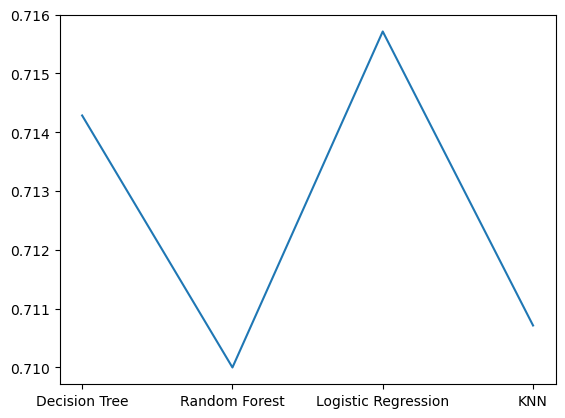

In [28]:
knn_best = KNeighborsClassifier(n_neighbors=8)
X2_train, X2_test, y_train, y_test = train_test_split(X2 , y, test_size = 0.3, random_state = 1)
models_dict = dict()
#models_dict['Decision Tree'] = decision_tree_best
#models_dict['Random Forest'] = random_forest_best
models_dict['KNN'] = knn_best
#models_dict['Logistic Regression'] = logistic_regression
kf =KFold(n_splits=10, shuffle=True, random_state=1)
#scores_mean = []
#model_names = []
for k,model in models_dict.items():
    scores = cross_val_score(model, X2_train, y_train, cv=kf, scoring='accuracy')
    scores_mean.append(scores.mean())
    print("Cross validation scores for {} model is {}".format(k,scores.mean()*100))
    model_names.append(k)
plt.plot(model_names,scores_mean)
plt.show()

In [29]:
final_rec_model = LogisticRegression().fit(X,y)
print("Output of logistic regression classifier on the whole dataset ",final_rec_model.predict(X))
print("Probabilities ",final_rec_model.predict_proba(X))
print("Accuracy_score : ",final_rec_model.score(X, y)*100)
print("Developed logistic regression model details {}".format(final_rec_model.get_params()))
print("Coefficients", final_rec_model.coef_, "Intercept", final_rec_model.intercept_)

Output of logistic regression classifier on the whole dataset  [0 0 0 ... 0 0 0]
Probabilities  [[0.82064422 0.17935578]
 [0.80586773 0.19413227]
 [0.81116986 0.18883014]
 ...
 [0.75290669 0.24709331]
 [0.7055172  0.2944828 ]
 [0.66741966 0.33258034]]
Accuracy_score :  71.1
Developed logistic regression model details {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Coefficients [[-0.03554574  0.17844762 -0.16298872  0.16898197 -0.17057241 -0.0072119 ]] Intercept [0.61649019]


In [30]:
dm2 = pd.read_csv(r'data\dmtest.csv')
dm2['revlast'] = dm2['revlast'].replace(0,0.0000001)
dm2['log10_n24'] = np.log(dm2['n24'])
dm2['log10_rev24'] = np.log(dm2['rev24'])
dm2['log10_revlast'] = np.log(dm2['revlast'])
dm2 = dm2.drop(['n24', 'rev24', 'revlast', 'id'], axis =1)
dm2

,elpsdm,ordfreq,ordcat,log10_n24,log10_rev24,log10_revlast
0,24,1,6,1.609438,5.225747,2.890372
1,24,1,6,0.693147,3.401197,2.708050
2,24,1,7,3.178054,5.891644,3.401197
3,24,1,6,1.386294,3.713572,2.708050
4,24,1,6,1.609438,4.077537,2.890372
...,...,...,...,...,...,...
1995,1,1,7,2.197225,5.105945,-16.118096
1996,1,3,6,2.397895,5.003946,2.708050
1997,1,2,5,2.890372,5.081404,2.564949
1998,1,4,7,3.258097,6.056784,3.218876


In [31]:
final_rec_model = LogisticRegression().fit(X,y)
probabilities = final_rec_model.predict_proba(dm2)
result_arr = []
for i in probabilities:
    if i[1] >= 0.5:
        result_arr.append(1)
    else:
        result_arr.append(0)
result_arr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [32]:
from collections import Counter
Counter(result_arr)

Counter({0: 1970, 1: 30})

In [33]:
ans_df = pd.DataFrame(result_arr,columns=["prediction"])
dm2["prediction"] = ans_df
dm2

,elpsdm,ordfreq,ordcat,log10_n24,log10_rev24,log10_revlast,prediction
0,24,1,6,1.609438,5.225747,2.890372,0
1,24,1,6,0.693147,3.401197,2.708050,0
2,24,1,7,3.178054,5.891644,3.401197,0
3,24,1,6,1.386294,3.713572,2.708050,0
4,24,1,6,1.609438,4.077537,2.890372,0
...,...,...,...,...,...,...,...
1995,1,1,7,2.197225,5.105945,-16.118096,0
1996,1,3,6,2.397895,5.003946,2.708050,0
1997,1,2,5,2.890372,5.081404,2.564949,0
1998,1,4,7,3.258097,6.056784,3.218876,0


In [34]:
dm2.to_csv('group05dmtest.csv', index=False)
df3=pd.read_csv('group05dmtest.csv')
df3

,elpsdm,ordfreq,ordcat,log10_n24,log10_rev24,log10_revlast,prediction
0,24,1,6,1.609438,5.225747,2.890372,0
1,24,1,6,0.693147,3.401197,2.708050,0
2,24,1,7,3.178054,5.891644,3.401197,0
3,24,1,6,1.386294,3.713572,2.708050,0
4,24,1,6,1.609438,4.077537,2.890372,0
...,...,...,...,...,...,...,...
1995,1,1,7,2.197225,5.105945,-16.118096,0
1996,1,3,6,2.397895,5.003946,2.708050,0
1997,1,2,5,2.890372,5.081404,2.564949,0
1998,1,4,7,3.258097,6.056784,3.218876,0


In [35]:
dm12 = pd.read_csv(r'data\dmtrain.csv')
lr2=dm12.copy()
lr2 = lr2.drop(lr2[lr2.revlast < 13].index)
lr2 = lr2.drop(lr2[lr2.revlast > 24].index)
lr2.drop(['id'],axis=1,inplace=True)
lr2['log10_n24'] = np.log(lr2['n24'])
lr2['log10_rev24'] = np.log(lr2['rev24'])
lr2['log10_revlast'] = np.log(lr2['revlast'])
lr2 = lr2.drop(['n24', 'rev24', 'revlast'], axis =1)
lr2

,elpsdm,ordfreq,ordcat,response,log10_n24,log10_rev24,log10_revlast
0,24,1,6,1,0.693147,3.401197,2.995732
1,24,1,6,0,3.218876,5.332719,2.995732
2,24,1,6,0,1.609438,3.951244,2.708050
3,24,1,6,0,2.397895,4.653960,2.708050
4,24,1,6,0,0.693147,3.465736,2.833213
...,...,...,...,...,...,...,...
1960,2,2,7,0,2.944439,6.161207,2.995732
1991,1,4,6,0,2.772589,5.568345,2.708050
1992,1,2,5,0,3.091042,5.384495,2.708050
1994,1,4,5,0,1.945910,4.158883,2.708050


In [36]:
X12 = lr2.copy()
X12 = X12.drop(['response'], axis = 1).to_numpy()
y12 = lr2['response'].to_numpy()
LR = LogisticRegression(random_state=1).fit(X12, y12)
fin_acc = LR.score(X12, y12)
print(fin_acc*100)

74.37641723356009
